### Target: FNGU - Tech, [HMMJ](https://www.horizonsetfs.com/horizons/media/pdfs/productsheets/HMMJ-Product-Sheet.pdf) - Weed stonks, or [XEG](https://www.blackrock.com/ca/investors/en/products/239839/ishares-sptsx-capped-energy-index-etf) - Candian OIL

Network stuff

In [292]:
# Importing the libraries
import numpy as np
import pandas as pd


# !pip install yfinance networkx
import yfinance as yf
import networkx as nx


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 6)   # Change the size of plots
plt.style.use('fivethirtyeight')  
  
  
start = datetime.datetime(2016,1,1)
# start = datetime.datetime(2018, 2, 1)
# end = datetime.datetime(2020, 9, 13)
end = datetime.date.today()

Populating the interactive namespace from numpy and matplotlib


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

<AxesSubplot:xlabel='Date'>

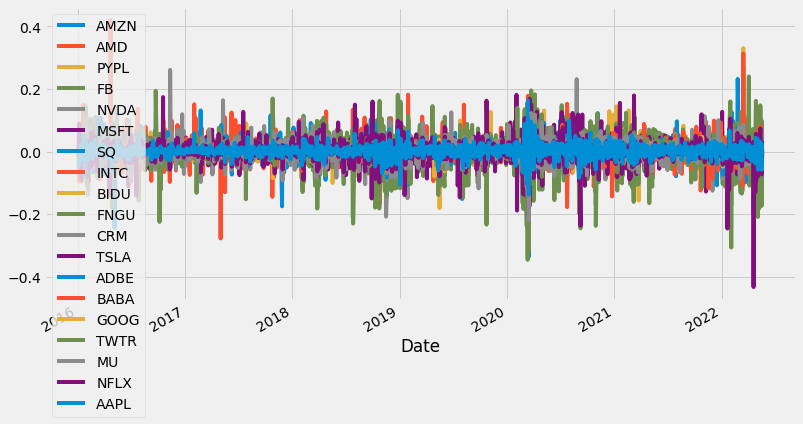

In [293]:
USE_LOG_RETURN = True

# ls = ['HMMJ,'ogi','hexo','cweb','smg','apha','gwprf','tlry','acb','cron','weed.TO'] # ,'weed'
# ls = ['XEG.to', 'SU.to','CNQ.to','CVE.to','TOU.to','IMO.to', ,'PXT.to','CPG.to','PSK.to','ARX.to','WCP.to'] # 'PXT.to' and after are less weighted in XEG - which is market cap weighted
ls = ['AAPL','NFLX','GOOG','FB','AMZN','BABA','BIDU','NVDA','TSLA','TWTR','FNGU', 'MSFT'] # FNGU ETF
ls.extend(['ADBE', 'AMD', 'AMZN', 'CRM', 'INTC', 'MSFT', 'MU', 'NFLX', 'PYPL', 'SQ']) # BULZ ETF
ls  = list(set(ls))


data = {} 

for i in ls:
  arry= yf.download(i, start, end)

  if USE_LOG_RETURN:
    data[i] =  pd.Series(np.diff(np.log(arry["Adj Close"])), index=arry.index[1:])
  else:
    data[i] = arry["Adj Close"]

stocks = pd.DataFrame(data)

# stocks=stocks.dropna()
stocks.plot(grid = True)

In [294]:
# np.sum(stocks.isna())
stocks.shape
stocks.dropna(inplace=True)
stocks.shape
stocks.head(5)

(1606, 19)

(1089, 19)

,AMZN,AMD,PYPL,FB,NVDA,MSFT,SQ,INTC,BIDU,FNGU,CRM,TSLA,ADBE,BABA,GOOG,TWTR,MU,NFLX,AAPL
Date,,,,,,,,,,,,,,,,,,,
2018-01-24,-0.003698,-0.017934,-0.005955,-0.014898,-0.013103,-0.000871,-0.015449,-0.012013,0.002367,-0.002056,-0.003450,-0.019752,-0.011612,0.016761,-0.004910,-0.016844,-0.019994,0.043049,-0.016057
2018-01-25,0.014945,-0.023887,0.007498,0.004973,0.002330,0.005539,0.017890,-0.004625,-0.014919,-0.000749,-0.007918,-0.024141,-0.001366,0.014219,0.005251,-0.009432,-0.001626,0.031641,-0.018012
2018-01-26,0.017339,0.042593,0.013075,0.013352,0.029105,0.018564,0.018663,0.100315,0.023757,0.079351,0.015422,0.015313,0.019007,0.034150,0.004663,0.090952,0.015229,0.018005,0.002335
2018-01-29,0.011086,0.028171,-0.013431,-0.021385,0.014362,-0.001490,-0.011816,-0.001999,-0.025372,0.016980,-0.003524,0.019296,-0.015368,-0.010827,-0.000221,0.036809,-0.008740,0.035734,-0.020916
2018-01-30,0.014106,-0.034368,-0.006306,0.006111,-0.016872,-0.012643,0.001979,-0.024098,-0.038816,-0.028462,-0.009489,-0.010671,-0.006732,-0.016639,-0.010166,0.017323,-0.038140,-0.020555,-0.005912


In [295]:
if not USE_LOG_RETURN:
    roi = (stocks.iloc[-1] - stocks.iloc[1])/stocks.iloc[1]
    roi = round(roi*100)
    roi = pd.DataFrame(roi)
    roi.transpose()
    roi.plot.bar()

<AxesSubplot:xlabel='Date'>

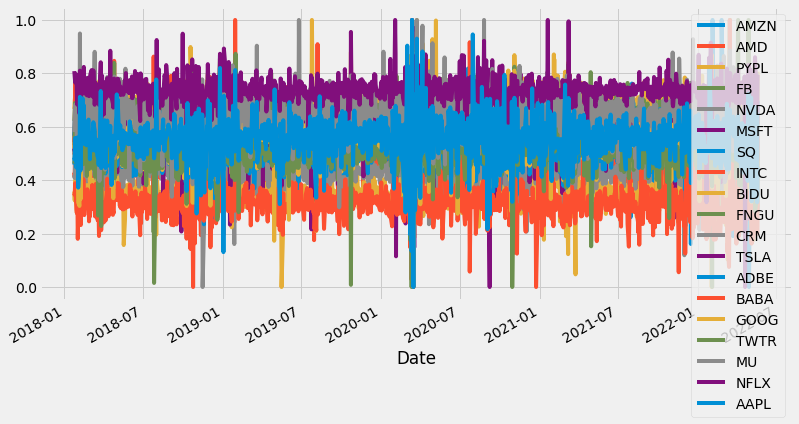

In [296]:
def normIt(df):
  # mean norm  # normalized_df=(df-df.mean())/df.std()
   return (df-df.min())/(df.max()-df.min()) 

stocks_norm = normIt(stocks)
stocks_norm.plot()

# Selecting the most correlated


In [297]:
from scipy.stats import spearmanr
stocks_norm_spearmanr = pd.DataFrame(spearmanr(stocks_norm)[0], columns=stocks.columns, index=stocks.columns)
stocks_norm_spearmanr_cumSum = stocks_norm_spearmanr.cumsum()
stocks_norm_spearmanr_cumSum

,AMZN,AMD,PYPL,FB,NVDA,MSFT,SQ,INTC,BIDU,FNGU,CRM,TSLA,ADBE,BABA,GOOG,TWTR,MU,NFLX,AAPL
AMZN,1.000000,0.541923,0.625558,0.624853,0.624292,0.695117,0.577580,0.492927,0.455803,0.757616,0.618062,0.408807,0.677299,0.477919,0.687036,0.459208,0.477280,0.622585,0.647235
AMD,1.541923,1.541923,1.145175,1.107293,1.338335,1.247966,1.107905,0.988068,0.838842,1.389669,1.134078,0.821137,1.241916,0.856011,1.190257,0.861589,1.021113,1.088981,1.158027
PYPL,2.167481,2.061540,2.145175,1.715330,1.953682,1.929727,1.799362,1.497046,1.297425,2.084466,1.806563,1.213263,1.946241,1.330961,1.803811,1.379325,1.470174,1.628268,1.746436
FB,2.792334,2.543980,2.753212,2.715330,2.512675,2.554442,2.302311,1.960124,1.724914,2.812566,2.359745,1.571781,2.572322,1.789194,2.515584,1.933866,1.922790,2.162679,2.325019
NVDA,3.416626,3.258023,3.368558,3.274323,3.512675,3.218309,2.908212,2.584191,2.180834,3.579866,2.964844,2.025663,3.242164,2.247417,3.130734,2.399956,2.551690,2.698414,2.948361
MSFT,4.111743,3.810872,4.050320,3.899038,4.176542,4.218309,3.477817,3.158021,2.639900,4.306526,3.676468,2.442350,4.032134,2.713421,3.881508,2.867146,3.068822,3.259427,3.655195
SQ,4.689323,4.341197,4.741777,4.401987,4.782443,4.787913,4.477817,3.574488,3.127244,4.984037,4.296560,2.870099,4.665770,3.169386,4.400766,3.394756,3.532176,3.772985,4.166570
INTC,5.182250,4.836338,5.250755,4.865065,5.406509,5.361744,4.894283,4.574488,3.540933,5.590504,4.759310,3.270659,5.184091,3.582287,4.953779,3.787710,4.186586,4.208680,4.727514
BIDU,5.638053,5.219377,5.709338,5.292553,5.862429,5.820810,5.381628,4.988177,4.540933,6.277904,5.217657,3.631331,5.653014,4.257530,5.427081,4.231778,4.614601,4.626589,5.172752
FNGU,6.395669,5.851430,6.404135,6.020653,6.629730,6.547470,6.059139,5.594644,5.228333,7.277904,5.897795,4.278246,6.388584,4.932665,6.170488,4.891544,5.194591,5.316120,5.904598


In [298]:
corrwith = stocks_norm.corr()
corr_cumSum = corrwith.cumsum()
corr_cumSum

,AMZN,AMD,PYPL,FB,NVDA,MSFT,SQ,INTC,BIDU,FNGU,CRM,TSLA,ADBE,BABA,GOOG,TWTR,MU,NFLX,AAPL
AMZN,1.000000,0.543030,0.586353,0.610754,0.637495,0.708465,0.591521,0.472171,0.390786,0.770707,0.628625,0.413050,0.682618,0.432960,0.667882,0.413487,0.478563,0.594369,0.644564
AMD,1.543030,1.543030,1.051966,1.043250,1.335818,1.275044,1.109133,0.907982,0.747351,1.399172,1.136724,0.813579,1.241456,0.793040,1.185933,0.738662,1.017156,1.014898,1.188280
PYPL,2.129383,2.008642,2.051966,1.626658,1.935604,1.936715,1.810477,1.393081,1.162784,2.085946,1.770949,1.232996,1.908634,1.243496,1.761319,1.183443,1.487191,1.521106,1.782794
FB,2.740137,2.441139,2.635373,2.626658,2.501148,2.560564,2.339115,1.839987,1.530083,2.809249,2.353385,1.573556,2.524836,1.649497,2.428454,1.657560,1.942994,2.021653,2.364113
NVDA,3.377632,3.139461,3.235159,3.192201,3.501148,3.275749,2.979970,2.428333,1.948503,3.590012,2.975142,2.033214,3.218263,2.092387,3.082448,2.088798,2.589003,2.514048,3.021490
MSFT,4.086097,3.706040,3.896831,3.816050,4.216333,4.275749,3.597747,3.054613,2.364762,4.371924,3.706492,2.502481,4.043539,2.541933,3.875922,2.553223,3.174959,3.029450,3.787220
SQ,4.677618,4.223652,4.598175,4.344687,4.857188,4.893525,4.597747,3.505962,2.841474,5.084732,4.329594,2.960515,4.690454,3.011847,4.430045,3.037001,3.686380,3.537039,4.341410
INTC,5.149790,4.659463,5.083274,4.791593,5.445534,5.519804,5.049096,4.505962,3.195998,5.670546,4.798508,3.330254,5.242752,3.382908,4.990057,3.424709,4.316535,3.900946,4.914206
BIDU,5.540576,5.016027,5.498708,5.158892,5.863954,5.936064,5.525808,4.860487,4.195998,6.330105,5.196353,3.690486,5.669642,4.059722,5.412259,3.783611,4.734263,4.254325,5.324264
FNGU,6.311283,5.644492,6.185482,5.882196,6.644717,6.717975,6.238616,5.446300,4.855558,7.330105,5.903629,4.369431,6.435082,4.725236,6.184381,4.408041,5.349541,4.924244,6.091603


In [330]:
stocks_norm_spearmanr_cumSum.sort_values("MSFT", inplace=True, axis=1)
top_N = stocks.columns.shape[0] // 3
top_N = stocks.columns.shape[0]# // 3

keepThese = stocks_norm_spearmanr_cumSum.iloc[:, -top_N:]

keepThese = keepThese.columns
if "FNGU" not in keepThese:
#   keepThese.append("FNGU")
    keepThese.append(pd.Index(["FNGU"]))
keepThese = keepThese.to_numpy()

# corr = stocks_norm_spearmanr[keepThese].round(2) # all rows. wont work well with code below (networkx)
corr = stocks_norm_spearmanr.loc[keepThese, keepThese].round(2) # only row the index rows
corr = corr - np.eye(len(corr))
corr

,TSLA,BIDU,BABA,TWTR,MU,INTC,NFLX,SQ,AAPL,CRM,AMD,GOOG,FB,ADBE,PYPL,AMZN,NVDA,MSFT,FNGU
TSLA,0.00,0.36,0.33,0.33,0.34,0.40,0.38,0.43,0.42,0.41,0.41,0.38,0.36,0.44,0.39,0.41,0.45,0.42,0.65
BIDU,0.36,0.00,0.68,0.44,0.43,0.41,0.42,0.49,0.45,0.46,0.38,0.47,0.43,0.47,0.46,0.46,0.46,0.46,0.69
BABA,0.33,0.68,0.00,0.44,0.42,0.41,0.42,0.46,0.45,0.43,0.38,0.47,0.46,0.45,0.47,0.48,0.46,0.47,0.68
TWTR,0.33,0.44,0.44,0.00,0.41,0.39,0.40,0.53,0.44,0.47,0.40,0.49,0.55,0.49,0.52,0.46,0.47,0.47,0.66
MU,0.34,0.43,0.42,0.41,0.00,0.65,0.39,0.46,0.50,0.44,0.54,0.52,0.45,0.48,0.45,0.48,0.63,0.52,0.58
INTC,0.40,0.41,0.41,0.39,0.65,0.00,0.44,0.42,0.56,0.46,0.50,0.55,0.46,0.52,0.51,0.49,0.62,0.57,0.61
NFLX,0.38,0.42,0.42,0.40,0.39,0.44,0.00,0.51,0.51,0.55,0.47,0.52,0.53,0.60,0.54,0.62,0.54,0.56,0.69
SQ,0.43,0.49,0.46,0.53,0.46,0.42,0.51,0.00,0.51,0.62,0.53,0.52,0.50,0.63,0.69,0.58,0.61,0.57,0.68
AAPL,0.42,0.45,0.45,0.44,0.50,0.56,0.51,0.51,0.00,0.57,0.51,0.66,0.58,0.63,0.59,0.65,0.62,0.71,0.73
CRM,0.41,0.46,0.43,0.47,0.44,0.46,0.55,0.62,0.57,0.00,0.52,0.61,0.55,0.76,0.67,0.62,0.61,0.71,0.68


In [331]:
# corr.cumsum() # shows which are the most correlated with each other. This is illustated in `nx.draw_spectral(graph, with_labels=True)`

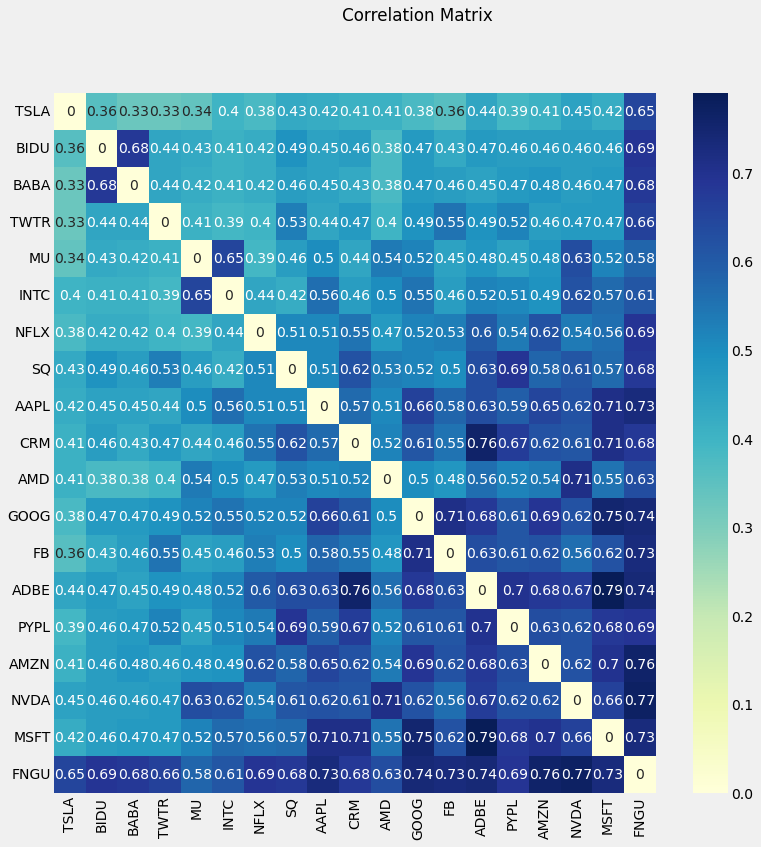

In [332]:
_=plt.subplots(figsize=(12, 12))
_=plt.suptitle("Correlation Matrix")
_=sns.heatmap(corr, annot=True, cmap="YlGnBu")

In [374]:
# for (u,v,d) in G.edges(data=True):
#     d['weight']

In [527]:
numb_edges = 10

# pos_corr_mat = np.where(corr_mat >= avg, corr_mat, 0)
all = corr.values.flatten()
all = all[all.nonzero()]
all = np.sort(all)[::-1]
# thresh = np.average(all) + 2*np.std(all)
thresh = all[numb_edges]


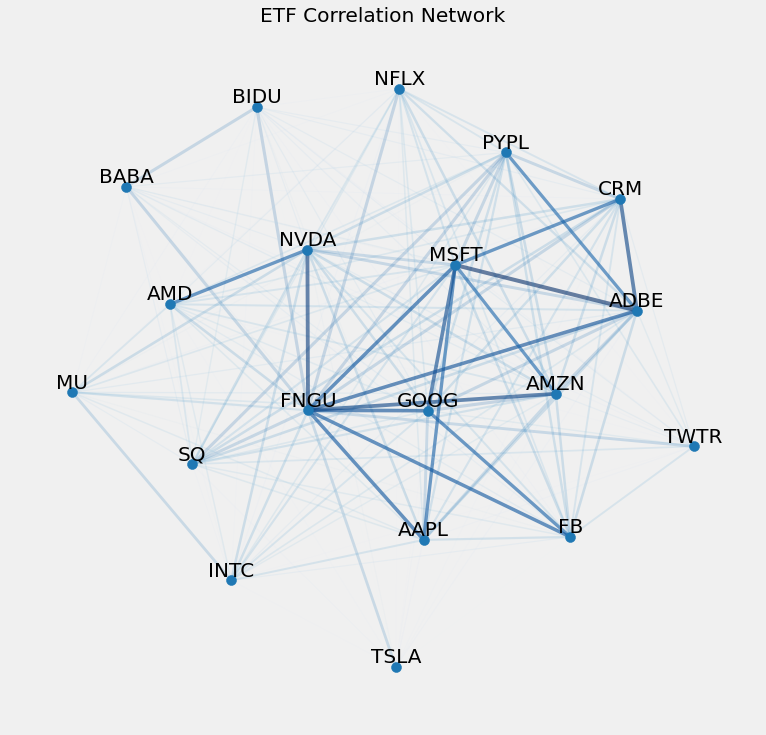

In [557]:
_=plt.figure(figsize=(12, 12))
_=plt.title("ETF Correlation Network")

G=nx.Graph()
# G=graph

for i in range(len(corr)):
  for j in range(len(corr)):
    if i!=j: # doesnt work.... 
      if np.abs(corr.iloc[i,j]) > 0.25:
        G.add_edge(keepThese[i], keepThese[j], weight=corr.iloc[i,j])

# for i in G.nodes():
#     G.remove_edge(i, i)



pos=nx.spring_layout(G) # positions for all nodes

# nodes
_=nx.draw_networkx_nodes(G,pos, node_size=100)


# Two types of egdes
# elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >= thresh]
# esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] < thresh]
# _=nx.draw_networkx_edges(G,pos,edgelist=esmall,
#                     width=1.5,alpha=0.25,edge_color='r') # ,style='dashed'
# _=nx.draw_networkx_edges(G,pos,edgelist=elarge,
#                     width=3,alpha=1,edge_color='g')
# ###############################################################################

# continuous width & alpha of edges 
weights = np.array([G[u][v]['weight'] for u,v in G.edges()])
weights_scaled = (weights - weights.min()) / (weights.max() - weights.min())
width = np.array(weights_scaled) * 4

weights_shewed = np.log(weights_scaled+1, where=weights_scaled != 0) # force a right shew
alpha = (weights_shewed - weights_shewed.min()) / (weights_shewed.max() - weights_shewed.min())
alpha = np.where(alpha < .35, .1, alpha)
alpha = np.where((alpha > .35) & (alpha < .85), .2, alpha)
alpha = np.where(alpha > .85, .6, alpha)
# alpha

_=nx.draw_networkx_edges(G,pos, alpha=alpha, width=width,
  edge_color=weights_scaled, edge_cmap=plt.cm.Blues)
# ###############################################################################

# labels
_=nx.draw_networkx_labels(G,pos, font_size=20, verticalalignment='bottom')

_=plt.axis('off')
# plt.savefig("weighted_graph.png") # save as png
plt.show() # display

In [529]:
corr_mat = np.matrix(corr, dtype=None)

graph = nx.from_numpy_matrix(corr_mat)
mapping = lambda i: keepThese[i]

graph = nx.relabel_nodes(graph, mapping)

Text(0.5, 1.0, 'ETF Correlation Network')

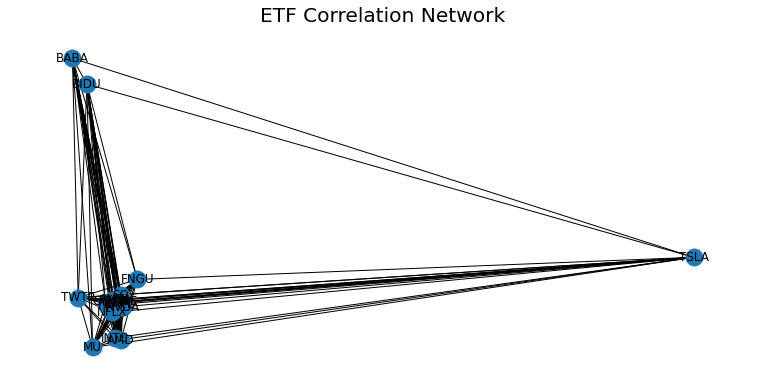

In [530]:
plt.title("ETF Correlation Network")
nx.draw_spectral(graph, with_labels=True)
# # nx.draw_shell(graph, with_labels=True, cmap=plt.get_cmap('jet'), node_size=500) # node_color='blue'

# # corr.cumsum() # shows which are the most correlated with each other. This is illustated in `nx.draw_spectral(graph, with_labels=True)`

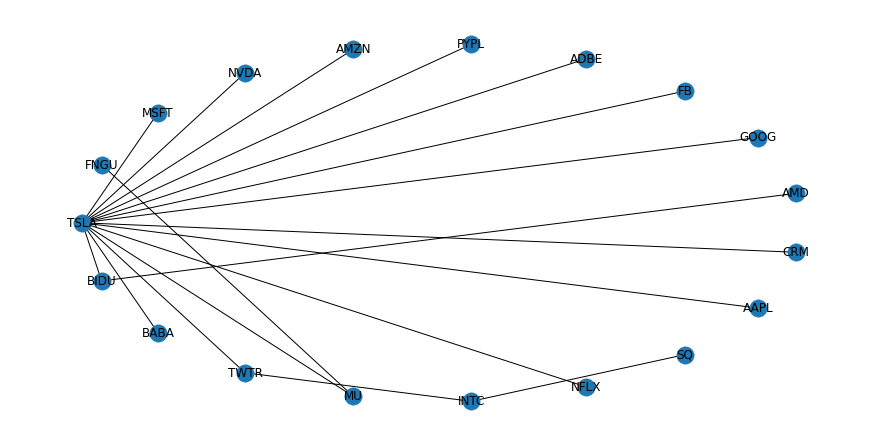

In [531]:
# # spanning tree 
span = nx.minimum_spanning_tree(graph)
nx.draw_shell(span, with_labels=True)